In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv("D:/Job_Predictor_DK/syntheticdata.csv")
df.columns = df.columns.str.strip()  

In [ ]:
df = df.rename(columns={
    "What role are you currently working in?": "current_role",
    "What location is your job in?": "job_location",
    "What were the key factors that helped you secure a job in Denmark?": "key_success_factors",
    "What resources or actions do you think were most beneficial for securing a job in Denmark?": "beneficial_actions",
    "Do you have any advice for other foreign professionals looking for a job in Denmark?": "advice_for_others",
    "What is your current job status": "current_job_status",
    "Are you currently living in Denmark": "living_in_denmark",
    "Which city/region in Denmark are you targeting for jobs?": "target_location",
    "What is your higher level of education": "education_level",
    "What is your field of study": "field_of_study",
    "How many years of relevant work experience do you have?": "experience_years",
    "Have you previously worked in Denmark?": "prior_dk_experience",
    "Which roles are you applying for?": "target_roles",
    "What is your preferred working model?": "working_model",
    "List your top 3 technical skills or job-relevant skills": "top_skills",
    "Which programming tools are you proficient in?": "tools_proficient",
    "How would you rate your English proficieny?": "english_proficiency",
    "Do you speak Danish?": "danish_proficiency",
    "What is your current visa/residency status in Denmark?": "visa_status",
    "How many jobs have you applied for in Denmark in the past 3 months?": "applications_last_3_months",
    "Have you been invited for interviews in Denmark?": "interview_invites",
    "What do you think is your biggest challenge in getting a job?": "biggest_challenge"
})

# Step 3: Handle missing values
df['experience_years'] = pd.to_numeric(df['experience_years'], errors='coerce')  # convert to numeric
df['experience_years'] = df['experience_years'].fillna(df['experience_years'].median())

df['applications_last_3_months'] = pd.to_numeric(df['applications_last_3_months'], errors='coerce')
df['applications_last_3_months'] = df['applications_last_3_months'].fillna(0)

df['interview_invites'] = df['interview_invites'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df = df.dropna(subset=['interview_invites'])  # drop rows where target is missing

# Step 4: Clean skills/tools columns
df['top_skills'] = df['top_skills'].fillna('').apply(lambda x: [s.strip().lower() for s in x.split(',')] if x else [])
df['tools_proficient'] = df['tools_proficient'].fillna('').apply(lambda x: [t.strip().lower() for t in x.split(',')] if x else [])

# Step 5: One-hot encode skills and tools
all_skills = set(skill for skills in df['top_skills'] for skill in skills)
all_tools = set(tool for tools in df['tools_proficient'] for tool in tools)

for skill in all_skills:
    df[f'skill_{skill}'] = df['top_skills'].apply(lambda skills: 1 if skill in skills else 0)

for tool in all_tools:
    df[f'tool_{tool}'] = df['tools_proficient'].apply(lambda tools: 1 if tool in tools else 0)

# Step 6: Drop original list columns
df = df.drop(columns=['top_skills', 'tools_proficient'])

# Final Step: Save cleaned dataset for modeling
df.to_csv("cleaned_job_data.csv", index=False)

# Preview
print("Final shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Sample:\n", df.head())


Final shape: (56, 105)
Columns: ['current_role', 'job_location', 'key_success_factors', 'beneficial_actions', 'advice_for_others', 'current_job_status', 'living_in_denmark', 'target_location', 'education_level', 'field_of_study', 'experience_years', 'prior_dk_experience', 'target_roles', 'working_model', 'english_proficiency', 'danish_proficiency', 'visa_status', 'applications_last_3_months', 'interview_invites', 'biggest_challenge', 'skill_c#', 'skill_communication', 'skill_data analysis', 'skill_domain', 'skill_quick learner', 'skill_power bi', 'skill_css', 'skill_vue', 'skill_statistical methods', 'skill_data cleaning', 'skill_wireframing', 'skill_cloud computing', 'skill_pandas', 'skill_javascript', 'skill_teamwork', 'skill_photography', 'skill_python', 'skill_electrical engineering', 'skill_adaptability', 'skill_prototyping', 'skill_ai enthusiastic', 'skill_java', 'skill_git', 'skill_dustribution', 'skill_guidewire', 'skill_biotechnology microbiology quality control', 'skill_ml', 

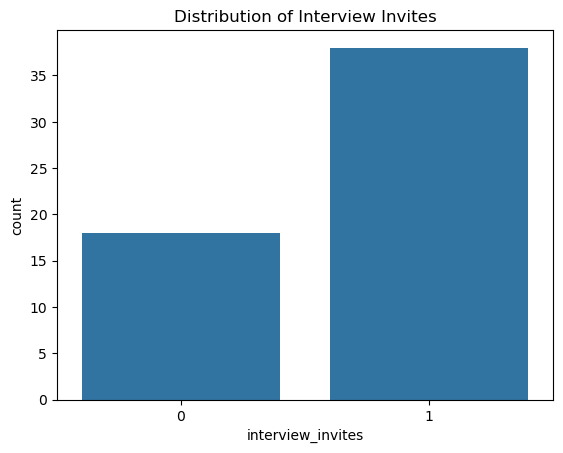

In [37]:
sns.countplot(x='interview_invites', data=df)
plt.title("Distribution of Interview Invites")
plt.show()


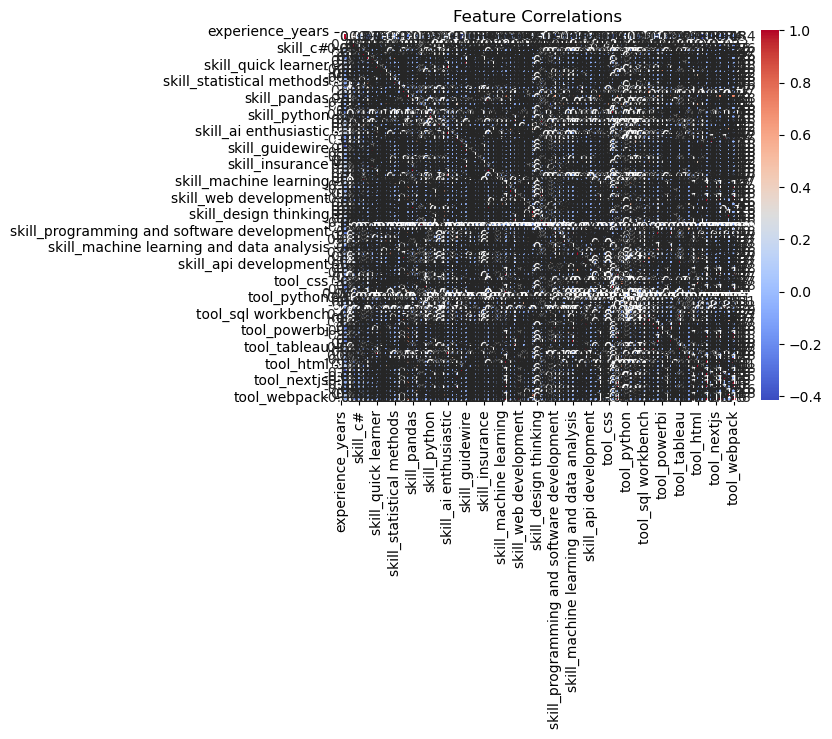

In [30]:
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

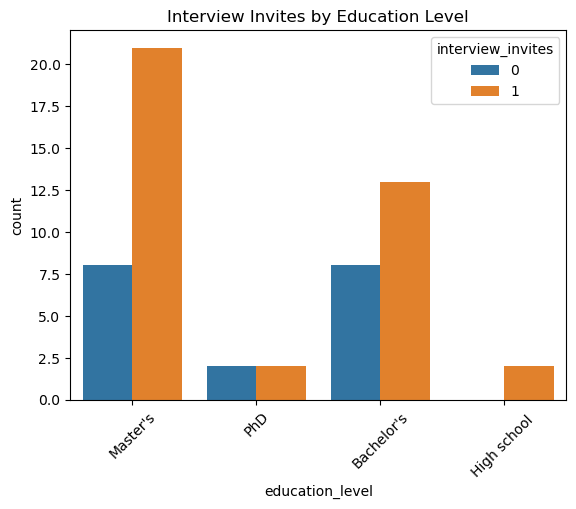

In [31]:
sns.countplot(x='education_level', hue='interview_invites', data=df)
plt.xticks(rotation=45)
plt.title("Interview Invites by Education Level")
plt.show()